In [1]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline

3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
1.19.2
1.1.3


In [2]:
# Load PIRUS Data
pirus = pd.read_csv('../data/clean_data/pirus_deep_clean_Final.csv')

# Load PIRUS Codebook
with open('../data/clean_data/pirus_codebook.json') as f:
    pirus_codebook = json.load(f)

# Load Custom Color Map
cmap = ['#E7E3DF', '#3186A9', '#EEAD9A', '#DBB03B', '#66759A', '#EBD79F', '#83684C', '#6D6E72', '#965341', '#8F917F', '#010503']

In [3]:
# Get gender/age distribution across ideologies

# Build ideology function to map code names to codes
ideology_codes = {'19': 'Male Supremacist','18': 'Other', '17': 'Anti-gay',
               '16': 'Jewish Defense League','15': 'Anti-Abortion', '14': 'Cult',
               '13': 'Irish Republican Army','12': 'Puerto Rican Nationalist',
               '11': 'Islamist', '10': 'Anarchist','9': 'Communist',
               '8': 'Black Nationalist','7': 'New Left', '6': 'Animal Rights/\nEnvironmentalist',
               '5': 'Christians','4': 'Anti-Government','3': 'Anti-Immigrant',
               '2': 'White Supremacist','1': 'Militia/Gun Rights'}
ideology_fun = lambda x:ideology_codes[str(int(x))]

# Build gender function to map code names to codes
gender_fun = lambda x:pirus_codebook['gender']['codes'][str(int(x))]

# Load relevant pirus columns into new DataFrame
ages = pirus[['age','gender','ideological_sub_category1']]

# Apply gender function to gender column
ages['gender'] = ages['gender'].apply(gender_fun)

# Isolate the top 7 ideologies
top_ideologies = list(ages.ideological_sub_category1.value_counts().head(7).index)

# Filter ages to only include instances of the top 7 ideologies
ages_idea = ages.loc[ages['ideological_sub_category1'].isin(top_ideologies)]

# Apply ideology function to ideology column
ages_idea['ideological_sub_category1'] = ages_idea['ideological_sub_category1'].apply(ideology_fun)

# Remove NaNs
ages_idea.dropna(inplace = True)

<ipython-input-3-19ecfda0ee5d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages['gender'] = ages['gender'].apply(gender_fun)
<ipython-input-3-19ecfda0ee5d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages_idea['ideological_sub_category1'] = ages_idea['ideological_sub_category1'].apply(ideology_fun)
<ipython-input-3-19ecfda0ee5d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Text(0.1, 10, 'Women')

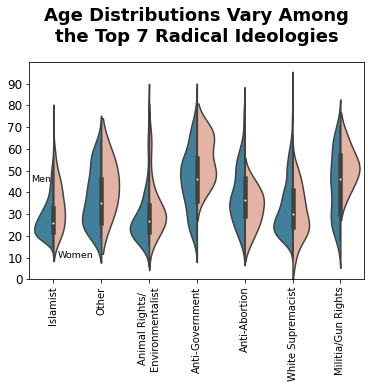

In [4]:
# Configure Violin Plot
fig, ax = plt.subplots(figsize= [6, 4])
ax = sns.violinplot(x = 'ideological_sub_category1', y='age', hue = 'gender',
                    data=ages_idea, palette = ['#3186A9','#EEAD9A'], split=True)

# Set Title
ax.set_title('Age Distributions Vary Among\nthe Top 7 Radical Ideologies', weight='bold',
             loc = 'center', pad = 20).set_fontsize('18')

# Adjust y axis
ax.set_ylabel("", fontsize = 12)
ax.set(ylim = (0,100))
plt.yticks(np.arange(0, 100, 10))
ax.set_yticklabels([0, 10 ,20, 30, 40, 50,60, 70, 80, 90], fontsize=12)

# Adjust x axis
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Remove Legend
ax.get_legend().remove()

# Add Annotations
annote1 = 'Men'
plt.text(-.47, 45, annote1, horizontalalignment='left', size=9.5, color='#010503', weight='normal')

annote2 = 'Women'
plt.text(.1, 10, annote2, horizontalalignment='left', size=9.5, color='#010503', weight='normal')
